Cel: zastosowanie CNN dla rozróżnienie kotów od psów 

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


Using TensorFlow backend.


In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-10-18 14:03:40--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 2607:f8b0:4001:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   109MB/s    in 0.6s    

2019-10-18 14:03:41 (109 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_= zipfile.ZipFile(local_zip, 'r')
zip_.extractall('/tmp')
zip_.close()

In [0]:
#Tworzenie ścieżek do poszczególnych katalogów

base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_dir = os.path.join(base_dir, 'validation')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


In [6]:
train_dir

'/tmp/cats_and_dogs_filtered/train'

In [7]:
files = os.listdir(train_cats_dir)
files[0]
os.path.join(train_cats_dir,files[0])

'/tmp/cats_and_dogs_filtered/train/cats/cat.479.jpg'

In [8]:
all_cat_files = os.listdir(train_cats_dir)
cats_files =[os.path.join(train_cats_dir,file) for file in all_cat_files][:10]
cats_files

['/tmp/cats_and_dogs_filtered/train/cats/cat.479.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.590.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.697.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.577.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.516.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.687.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.345.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.408.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.951.jpg',
 '/tmp/cats_and_dogs_filtered/train/cats/cat.208.jpg']

In [9]:
all_dog_files = os.listdir(train_dogs_dir)
dogs_files =[os.path.join(train_dogs_dir,file) for file in all_dog_files][:10]
dogs_files

['/tmp/cats_and_dogs_filtered/train/dogs/dog.453.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.965.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.640.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.146.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.992.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.90.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.479.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.685.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.475.jpg',
 '/tmp/cats_and_dogs_filtered/train/dogs/dog.430.jpg']

In [0]:
def plot_images(item_dir, top=25):
  all_item_dirs= os.listdir(item_dir)
  item_files =[os.path.join(item_dir,file) for file in all_dog_files][:10]
                           
  plt.figure(figsize=(10,10))
  for idx, img_path in enumerate(item_files):
    plt.subplot(5,5,idx+1)
    img = mpimg.imread(img_path)
    plt.imshow(img)
  plt.tight_layout()

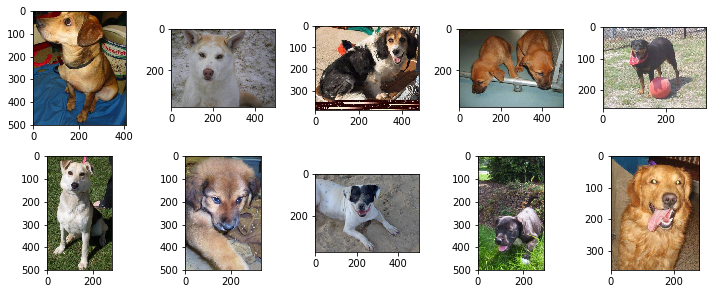

In [61]:
plot_images(train_dogs_dir)

In [12]:
#inicjalizacja obrazów
input_shape = (150,150,3)

model = Sequential([
    Conv2D(filters =32, kernel_size=(3,3), input_shape= input_shape),
    MaxPool2D (pool_size=(2,2)),
    
    Conv2D(filters =64, kernel_size=(3,3)),
    MaxPool2D (pool_size=(2,2)),
                         
    Conv2D(filters =64, kernel_size=(3,3)),
    MaxPool2D (pool_size=(2,2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dropout (0.5),
    #Ze względu na klasyfikacje binarną na wyjściu tylko 1 neuron
    Dense(1, activation='sigmoid')
    
])
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)            

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=(150,150),
  batch_size=20,
  class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
  train_dir,
  target_size=(150,150),
  batch_size=20,
  class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [15]:
history = model.fit_generator(
train_generator,
    steps_per_epoch = 100,
    epochs=5,
    validation_data = validation_generator,
    validation_steps= 50,
    verbose=2

)




Epoch 1/5





 - 91s - loss: 0.7519 - acc: 0.5405 - val_loss: 0.6729 - val_acc: 0.6180
Epoch 2/5
 - 89s - loss: 0.6670 - acc: 0.5885 - val_loss: 0.6297 - val_acc: 0.6350
Epoch 3/5
 - 92s - loss: 0.6678 - acc: 0.6005 - val_loss: 0.6204 - val_acc: 0.6320
Epoch 4/5
 - 90s - loss: 0.6512 - acc: 0.6220 - val_loss: 0.6176 - val_acc: 0.6580
Epoch 5/5
 - 90s - loss: 0.6383 - acc: 0.6275 - val_loss: 0.6297 - val_acc: 0.6420
